In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [2]:
features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"]

In [85]:
df=pd.read_csv("adult.data",names=features)

In [86]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [87]:
df.shape

(32561, 15)

In [88]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital Gain       int64
Capital Loss       int64
Hours per week     int64
Country           object
Target            object
dtype: object

In [89]:
obj_cols=df.dtypes[df.dtypes=="object"].index

In [90]:
obj_cols

Index(['Workclass', 'Education', 'Martial Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Country', 'Target'],
      dtype='object')

In [91]:
df[obj_cols].head()

,Workclass,Education,Martial Status,Occupation,Relationship,Race,Sex,Country,Target
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [92]:
obj_cols=obj_cols.drop("Target")

In [93]:
remaincols=list(set(df.columns)-set(obj_cols))
df=pd.get_dummies(df,columns=obj_cols)

In [94]:
def generate_dict(data):
  return {i:j for j,i in enumerate(df[data].unique())}

# dictnames=["d_"+col for col in obj_cols]
# coldict={dictnames[i]:generate_dict(obj_cols[i]) for i in range(len(obj_cols))}

# for col in obj_cols:
#   df[col]=df[col].map(coldict["d_"+col])



In [95]:
df['Target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [96]:
df['Target']=df['Target'].map({" <=50K":0," >50K":1})

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
corr_mat=df.corr()

In [99]:
corr_mat

,Age,fnlwgt,Education-Num,Capital Gain,Capital Loss,Hours per week,Target,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
Age,1.000000,-0.076646,0.036527,0.077674,5.777454e-02,0.068756,0.234037,0.042627,0.051227,0.060901,...,0.004242,0.008374,0.002583,0.000613,-0.013816,-0.006271,0.004843,0.015917,-1.505357e-02,0.000375
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-1.025171e-02,-0.018768,-0.009463,-0.002923,-0.007525,-0.002828,...,-0.013152,0.007164,-0.003790,-0.012365,-0.001252,-0.001250,0.005273,-0.075287,-1.139827e-02,0.005501
Education-Num,0.036527,-0.043195,1.000000,0.122630,7.992296e-02,0.148123,0.335154,-0.077946,0.060518,0.097941,...,-0.044286,-0.041269,0.001264,0.016046,0.049472,0.007896,-0.017071,0.101207,-7.483035e-03,-0.001234
Capital Gain,0.077674,0.000432,0.122630,1.000000,-3.161506e-02,0.078409,0.223329,-0.015585,-0.005768,-0.007007,...,-0.003879,-0.006103,-0.001680,0.005323,0.005735,-0.003432,-0.003526,0.004599,-2.564276e-03,-0.002193
Capital Loss,0.057775,-0.010252,0.079923,-0.031615,1.000000e+00,0.054256,0.150526,-0.016102,0.010798,0.014668,...,-0.007308,-0.004718,-0.004160,0.010114,0.006637,-0.005095,0.008102,0.008784,-5.997599e-07,-0.004804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Country_ Thailand,-0.006271,-0.001250,0.007896,-0.003432,-5.095482e-03,0.009537,-0.004078,-0.000085,-0.004099,-0.006164,...,-0.000793,-0.001394,-0.000452,-0.001167,-0.000932,1.000000,-0.000568,-0.068978,-1.067931e-03,-0.000521
Country_ Trinadad&Tobago,0.004843,0.005273,-0.017071,-0.003526,8.102329e-03,-0.006006,-0.007660,-0.000393,-0.004212,-0.001148,...,-0.000815,-0.001432,-0.000464,-0.001199,-0.000957,-0.000568,1.000000,-0.070869,-1.097212e-03,-0.000536
Country_ United-States,0.015917,-0.075287,0.101207,0.004599,8.783567e-03,0.002446,0.034470,0.006193,0.015441,0.033196,...,-0.098924,-0.173848,-0.056315,-0.145558,-0.116167,-0.068978,-0.070869,1.000000,-1.331803e-01,-0.065031
Country_ Vietnam,-0.015054,-0.011398,-0.007483,-0.002564,-5.997599e-07,-0.011379,-0.017649,-0.002286,0.000099,-0.003611,...,-0.001532,-0.002692,-0.000872,-0.002254,-0.001799,-0.001068,-0.001097,-0.133180,1.000000e+00,-0.001007


<Axes: >

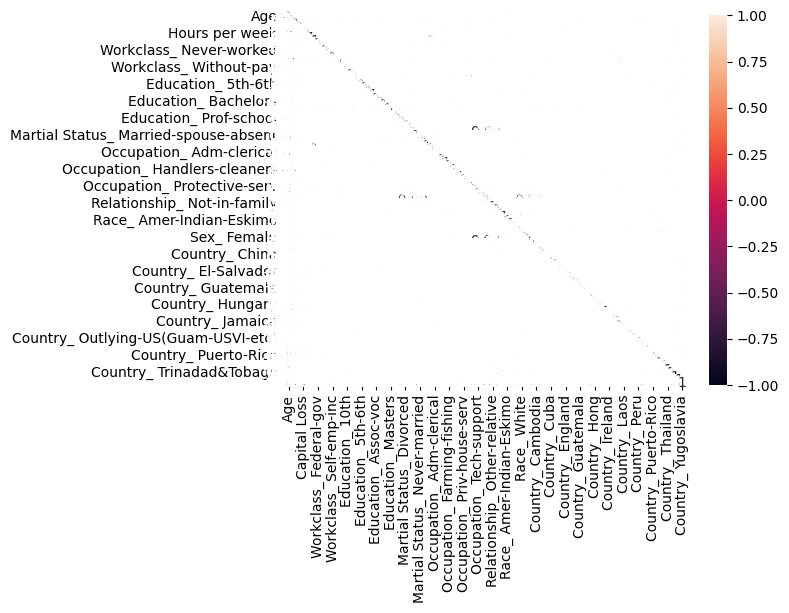

In [100]:
sns.heatmap(corr_mat,annot=True)

In [101]:
xtrain,xtest=train_test_split(df,stratify=df['Target'])

In [102]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [104]:
ytrain=xtrain['Target']
xtrain.drop(['Target'],axis=1,inplace=True)
ytest=xtest['Target']
xtest.drop(['Target'],axis=1,inplace=True)


In [105]:
from sklearn.linear_model import LogisticRegression

In [106]:
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [107]:
print(accuracy_score(ytest,model.predict(xtest)))

0.7956025058346641


In [109]:
import joblib
f=open("model.pkl","wb")
joblib.dump(model,f)

In [111]:
rfmodel=RandomForestClassifier(n_estimators=100,max_depth=5)
rfmodel.fit(xtrain,ytrain)
print(accuracy_score(ytest,rfmodel.predict(xtest)))

0.8397002825205748


In [112]:
f=open("rfmodel.pkl","wb")
joblib.dump(rfmodel,f)


In [113]:
f.close()

In [114]:
bibledf=pd.read_csv("bible_data_set.csv")

In [115]:
bibledf.head()

,citation,book,chapter,verse,text
0,Genesis 1:1,Genesis,1,1,In the beginning God created the heaven and th...
1,Genesis 1:2,Genesis,1,2,"And the earth was without form, and void; and ..."
2,Genesis 1:3,Genesis,1,3,"And God said, Let there be light: and there wa..."
3,Genesis 1:4,Genesis,1,4,"And God saw the light, that it was good: and G..."
4,Genesis 1:5,Genesis,1,5,"And God called the light Day, and the darkness..."


In [116]:
bibledf.book.unique()

array(['Genesis', 'Exodus', 'Leviticus', 'Numbers', 'Deuteronomy',
       'Joshua', 'Judges', 'Ruth', '1 Samuel', '2 Samuel', '1 Kings',
       '2 Kings', '1 Chronicles', '2 Chronicles', 'Ezra', 'Nehemiah',
       'Esther', 'Job', 'Psalms', 'Proverbs', 'Ecclesiastes',
       'Song of Solomon', 'Isaiah', 'Jeremiah', 'Lamentations', 'Ezekiel',
       'Daniel', 'Hosea', 'Joel', 'Amos', 'Obadiah', 'Jonah', 'Micah',
       'Nahum', 'Habakkuk', 'Zephaniah', 'Haggai', 'Zechariah', 'Malachi',
       'Matthew', 'Mark', 'Luke', 'John', 'Acts', 'Romans',
       '1 Corinthians', '2 Corinthians', 'Galatians', 'Ephesians',
       'Philippians', 'Colossians', '1 Thessalonians', '2 Thessalonians',
       '1 Timothy', '2 Timothy', 'Titus', 'Philemon', 'Hebrews', 'James',
       '1 Peter', '2 Peter', '1 John', '2 John', '3 John', 'Jude',
       'Revelation'], dtype=object)